In [42]:
# imports
from fastai import *
from fastai.vision.all import *
from fastai.callback.all import *

import seaborn as sns
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [28]:
path = Path('../../data/food-101')
path_meta = path /'meta'
path_images = path/'images'

In [29]:
path_meta

Path('../../data/food-101/meta')

In [30]:
def build_data_frame(path_name, file_name, img_format = 'jpg'):
    """
    build_data_frame input the path and file name, the function will return the dataframe with two columns:
    ['label'] : image label
    ['image_file'] : image file name with directory information
    input paramters:
    path_name : path 
    file_name : file name, string
    img_format : default format is jpg
    
    return dataframe
    """
    path_file = path_name/file_name
    file_df = pd.read_csv(path_file,delimiter='/', header=None, names=['label', 'image_file'])
    file_df['image_file'] = file_df['label'].astype(str) + '/' + file_df['image_file'].astype(str) + '.'+img_format
    
    return file_df

In [31]:
train_df = build_data_frame(path_meta, 'train.txt')
test_df = build_data_frame(path_meta, 'test.txt')

In [32]:
train_df.head()

,label,image_file
0,apple_pie,apple_pie/1005649.jpg
1,apple_pie,apple_pie/1014775.jpg
2,apple_pie,apple_pie/1026328.jpg
3,apple_pie,apple_pie/1028787.jpg
4,apple_pie,apple_pie/1043283.jpg


In [34]:
test_df.head()

,label,image_file
0,apple_pie,apple_pie/1011328.jpg
1,apple_pie,apple_pie/101251.jpg
2,apple_pie,apple_pie/1034399.jpg
3,apple_pie,apple_pie/103801.jpg
4,apple_pie,apple_pie/1038694.jpg


In [35]:
batch_size = 64

In [67]:
# Explore the dataset

train_data = ImageDataLoaders.from_df(df=train_df, path=path_images, fn_col=1, 
                                      label_col=0, valid_pct=0.2, bs=batch_size, item_tfms=Resize(224))

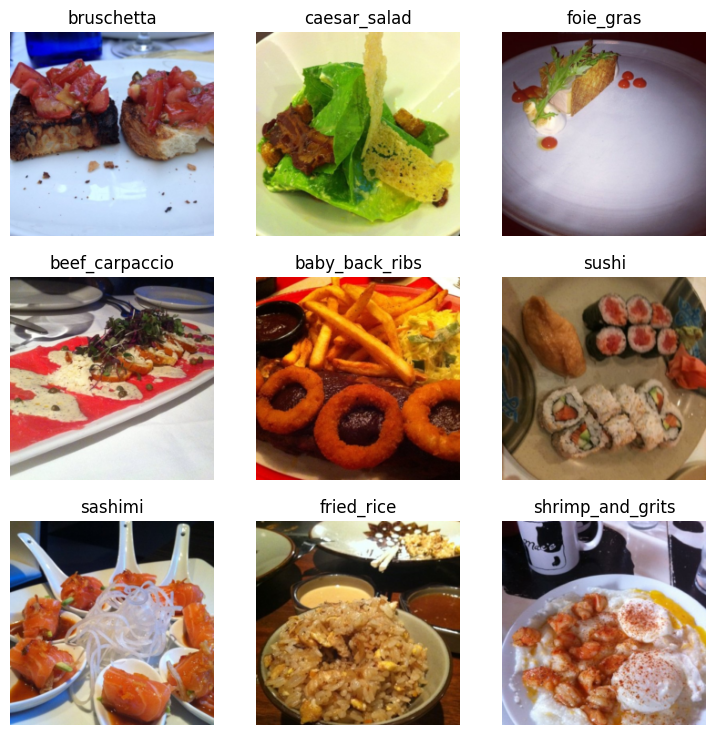

In [66]:
train_data.show_batch()

In [70]:
train_data.c

101

In [80]:
learn = vision_learner(train_data, resnet34, metrics=error_rate)

/Users/anshitverma/Desktop/RoboChef/env/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/anshitverma/Desktop/RoboChef/env/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /Users/anshitverma/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████| 83.3M/83.3M [00:04<00:00, 21.6MB/s]


In [81]:
# learn.lr_find()
learn.save('food-101-ResNet50-1e-2-v2', )

KeyboardInterrupt: 

In [ ]:
learn.recorder.